In [1]:
import pandas as pd
import seaborn as sns; sns.set_color_codes()
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
from scipy.stats import kstest

In [2]:
def set_style(ax):
    i=0
    for x in ax:
    #     Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        # Remove title
        x.set_title("")

        # Set x-axis label
#         print(i)
        if i==0:
            xlabel="Residuals for PQ"
        else:
            xlabel="Residuals for ATT"
        x.set_xlabel(xlabel,labelpad=20, weight='bold', size=12)
        i=i+1
        
        # Set y-axis label
    #     x.set_ylabel("Sessions", labelpad=20, weight='bold', size=12)

        # Format y-axis label
#         x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    

Text(0.5,0.98,'PCA on transformed features with 80% variance explained')

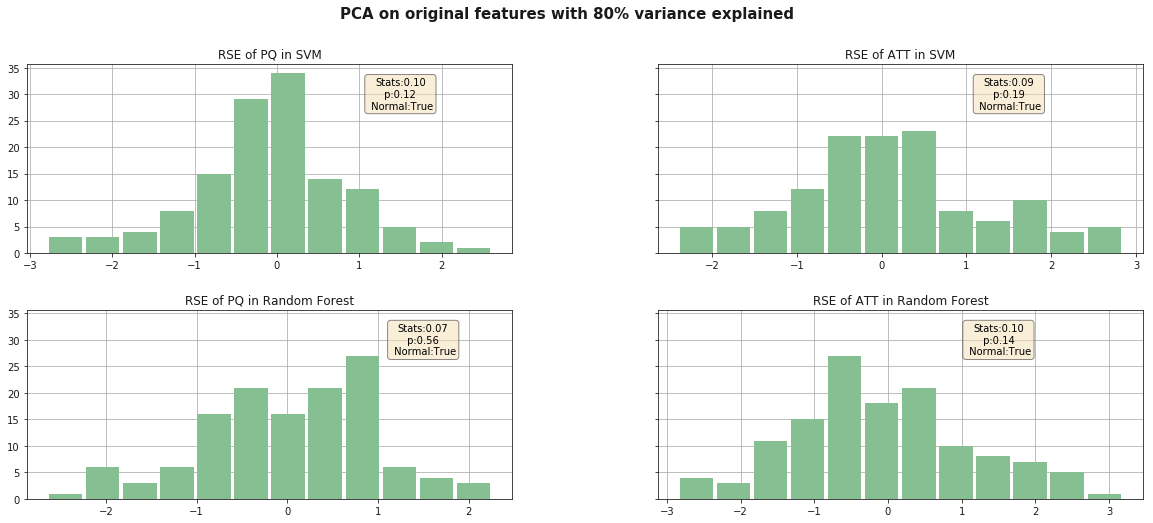

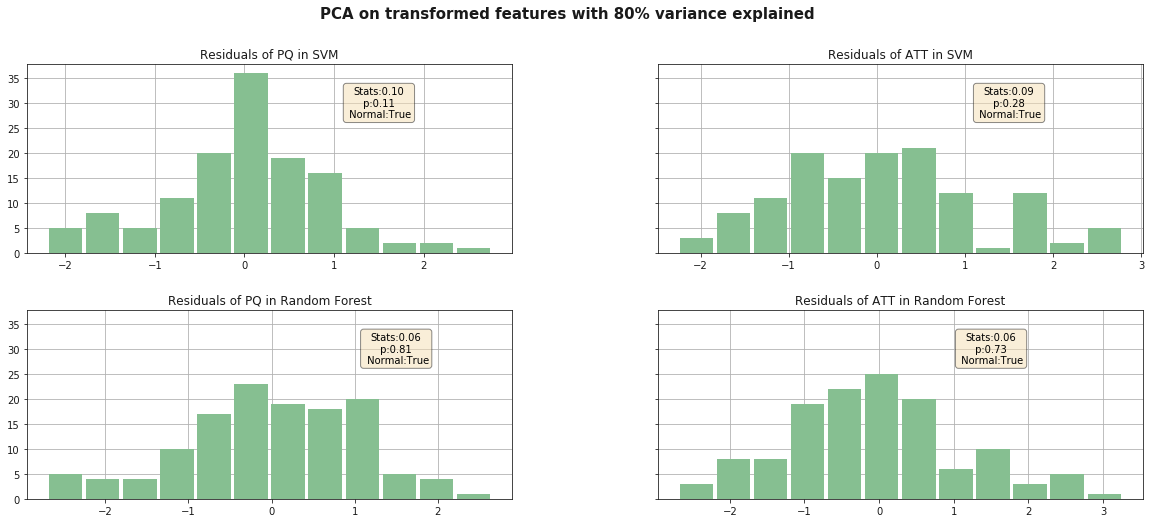

In [7]:
xl_svm = pd.read_excel('study1_PCA_alltargets_mahalanobis_0.8_predictions.xlsx',sheet_name='SVM')
xl_rf = pd.read_excel('study1_PCA_alltargets_mahalanobis_0.8_predictions.xlsx',sheet_name='Random Forest')
fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
xl_svm.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
stats, p = kstest(xl_svm['Residuals_PQ'],'norm')


# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

xl_svm.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
stats, p = kstest(xl_svm['Residuals_ATT'],'norm')
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[0][0].set_title('RSE of PQ in SVM')
ax[0][1].set_title('RSE of ATT in SVM')
# fig.suptitle("SVM afer applying PCA on original features with 80% variance explained",weight='bold')


# fig ,ax = plt.subplots(1,2,figsize=(8,4))
stats, p = kstest(xl_rf['Residuals_PQ'],'norm')
xl_rf.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)
xl_rf.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
stats, p = kstest(xl_rf['Residuals_ATT'],'norm')
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[1][0].set_title('RSE of PQ in Random Forest')
ax[1][1].set_title('RSE of ATT in Random Forest')

fig.suptitle("PCA on original features with 80% variance explained",weight='bold', fontsize=15)


xl_svm = pd.read_excel('study1_PCA_alltargets_mahalanobis_transformed_0.8_predictions.xlsx',sheet_name='SVM')
xl_rf = pd.read_excel('study1_PCA_alltargets_mahalanobis_transformed_0.8_predictions.xlsx',sheet_name='Random Forest')
fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
xl_svm.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
stats, p = kstest(xl_svm['Residuals_PQ'],'norm')


# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

xl_svm.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
stats, p = kstest(xl_svm['Residuals_ATT'],'norm')
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[0][0].set_title('Residuals of PQ in SVM')
ax[0][1].set_title('Residuals of ATT in SVM')
# fig.suptitle("SVM afer applying PCA on original features with 80% variance explained",weight='bold')


# fig ,ax = plt.subplots(1,2,figsize=(8,4))
stats, p = kstest(xl_rf['Residuals_PQ'],'norm')
xl_rf.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)
xl_rf.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
stats, p = kstest(xl_rf['Residuals_ATT'],'norm')
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[1][0].set_title('Residuals of PQ in Random Forest')
ax[1][1].set_title('Residuals of ATT in Random Forest')

fig.suptitle("PCA on transformed features with 80% variance explained",weight='bold',fontsize=15)

Text(0.5,0.98,'Feature selection on transformed features  after applying PCA explaining 80% variance')

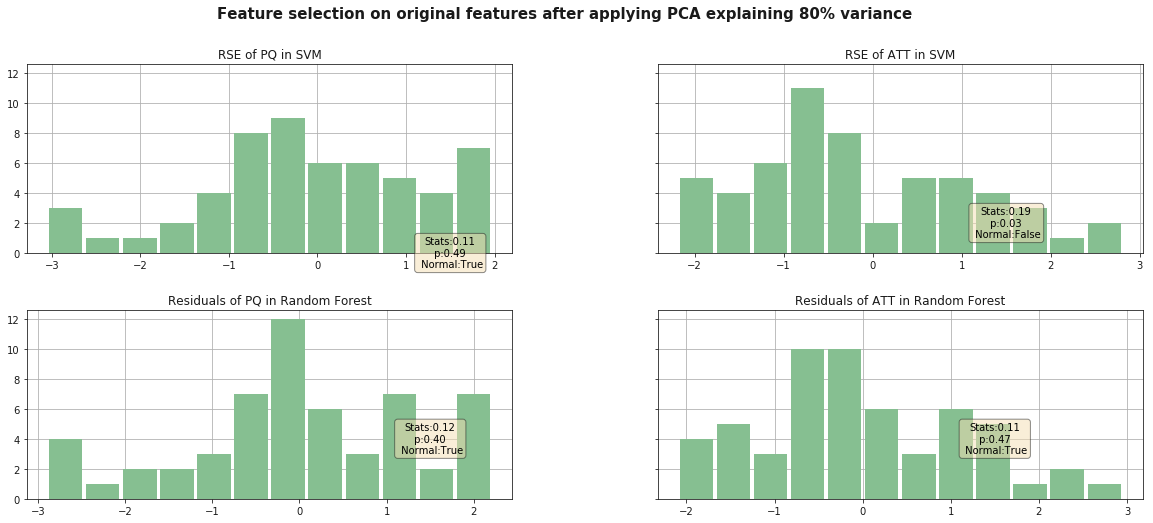

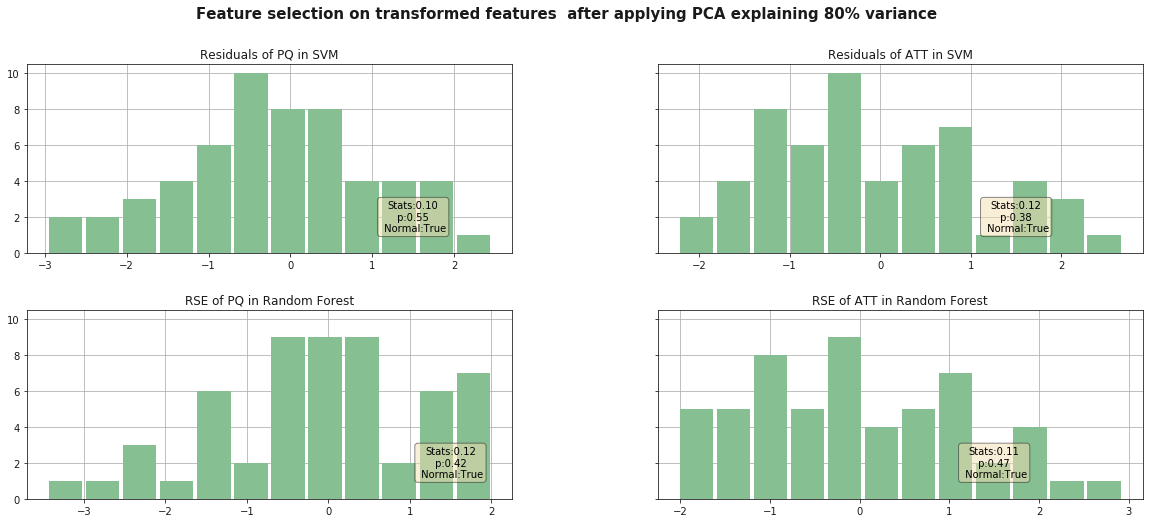

In [8]:
xl_svm = pd.read_excel('study1_feature_selection_alltargets_mahalanobis_PCA_0.8_predictions.xlsx',sheet_name='SVM')
xl_rf = pd.read_excel('study1_feature_selection_alltargets_mahalanobis_PCA_0.8_predictions.xlsx',sheet_name='Random Forest')

fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
xl_svm.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
stats, p = kstest(xl_svm['Residuals_PQ'],'norm')


# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

xl_svm.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
stats, p = kstest(xl_svm['Residuals_ATT'],'norm')
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[0][0].set_title('RSE of PQ in SVM')
ax[0][1].set_title('RSE of ATT in SVM')
# fig.suptitle("SVM afer applying PCA on original features with 80% variance explained",weight='bold')


# fig ,ax = plt.subplots(1,2,figsize=(8,4))
stats, p = kstest(xl_rf['Residuals_PQ'],'norm')
xl_rf.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)
xl_rf.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
stats, p = kstest(xl_rf['Residuals_ATT'],'norm')
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[1][0].set_title('Residuals of PQ in Random Forest')
ax[1][1].set_title('Residuals of ATT in Random Forest')

fig.suptitle("Feature selection on original features after applying PCA explaining 80% variance ",weight='bold', fontsize=15)



xl_svm = pd.read_excel('study1_feature_selection_alltargets_mahalanobis_transformed_PCA_0.8_predictions.xlsx',sheet_name='SVM')
xl_rf = pd.read_excel('study1_feature_selection_alltargets_mahalanobis_transformed_PCA_0.8_predictions.xlsx',sheet_name='Random Forest')

fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
xl_svm.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
stats, p = kstest(xl_svm['Residuals_PQ'],'norm')


# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

xl_svm.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
stats, p = kstest(xl_svm['Residuals_ATT'],'norm')
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[0][0].set_title('Residuals of PQ in SVM')
ax[0][1].set_title('Residuals of ATT in SVM')
# fig.suptitle("SVM afer applying PCA on original features with 80% variance explained",weight='bold')


# fig ,ax = plt.subplots(1,2,figsize=(8,4))
stats, p = kstest(xl_rf['Residuals_PQ'],'norm')
xl_rf.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)
xl_rf.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
stats, p = kstest(xl_rf['Residuals_ATT'],'norm')
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[1][0].set_title('RSE of PQ in Random Forest')
ax[1][1].set_title('RSE of ATT in Random Forest')

fig.suptitle("Feature selection on transformed features  after applying PCA explaining 80% variance",weight='bold', fontsize=15)

Text(0.5,0.98,'PCA on transformed features with 80% variance explained')

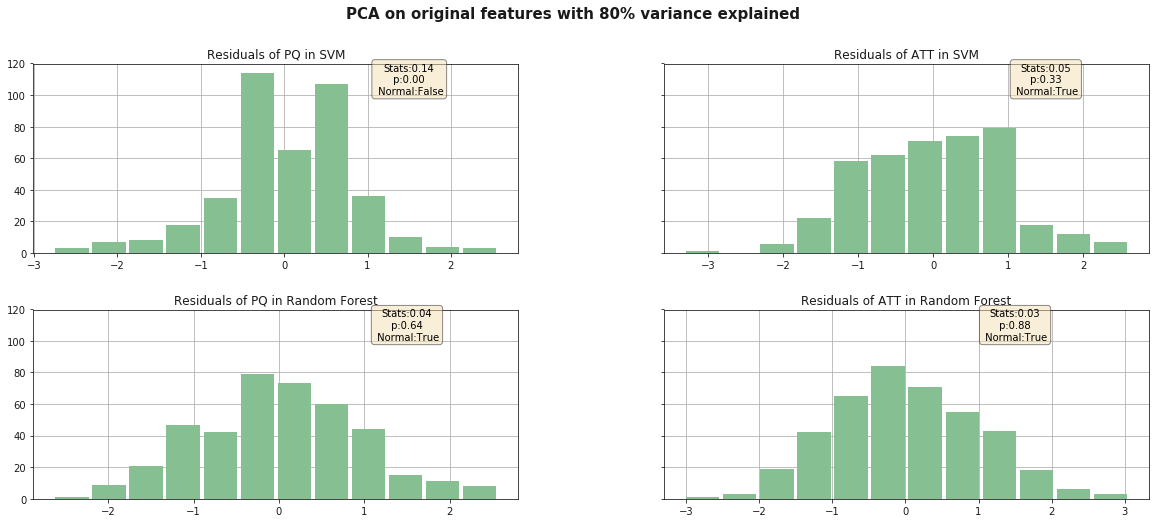

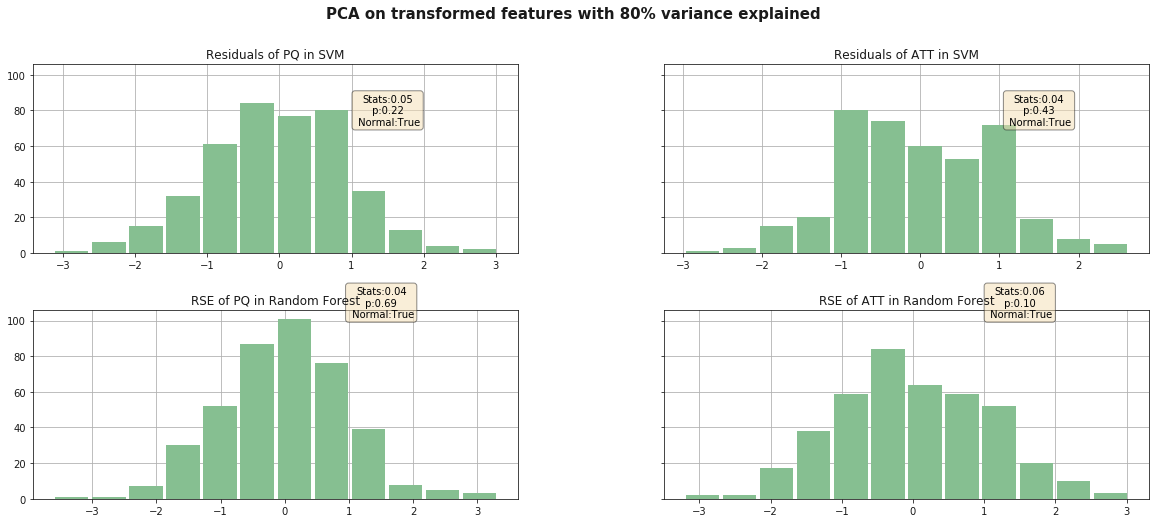

In [9]:
xl_svm = pd.read_excel('study2_PCA_alltargets_mahalanobis_0.8_predictions.xlsx',sheet_name='SVM')
xl_rf = pd.read_excel('study2_PCA_alltargets_mahalanobis_0.8_predictions.xlsx',sheet_name='Random Forest')
fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
xl_svm.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
stats, p = kstest(xl_svm['Residuals_PQ'],'norm')


# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

xl_svm.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
stats, p = kstest(xl_svm['Residuals_ATT'],'norm')
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[0][0].set_title('Residuals of PQ in SVM')
ax[0][1].set_title('Residuals of ATT in SVM')
# fig.suptitle("SVM afer applying PCA on original features with 80% variance explained",weight='bold')


# fig ,ax = plt.subplots(1,2,figsize=(8,4))
stats, p = kstest(xl_rf['Residuals_PQ'],'norm')
xl_rf.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)
xl_rf.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
stats, p = kstest(xl_rf['Residuals_ATT'],'norm')
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[1][0].set_title('Residuals of PQ in Random Forest')
ax[1][1].set_title('Residuals of ATT in Random Forest')

fig.suptitle("PCA on original features with 80% variance explained",weight='bold', fontsize=15)


xl_svm = pd.read_excel('study2_PCA_alltargets_mahalanobis_transformed_0.8_predictions.xlsx',sheet_name='SVM')
xl_rf = pd.read_excel('study2_PCA_alltargets_mahalanobis_transformed_0.8_predictions.xlsx',sheet_name='Random Forest')
fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
xl_svm.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
stats, p = kstest(xl_svm['Residuals_PQ'],'norm')


# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

xl_svm.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
stats, p = kstest(xl_svm['Residuals_ATT'],'norm')
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[0][0].set_title('Residuals of PQ in SVM')
ax[0][1].set_title('Residuals of ATT in SVM')
# fig.suptitle("SVM afer applying PCA on original features with 80% variance explained",weight='bold')


# fig ,ax = plt.subplots(1,2,figsize=(8,4))
stats, p = kstest(xl_rf['Residuals_PQ'],'norm')
xl_rf.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)
xl_rf.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
stats, p = kstest(xl_rf['Residuals_ATT'],'norm')
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[1][0].set_title('RSE of PQ in Random Forest')
ax[1][1].set_title('RSE of ATT in Random Forest')

fig.suptitle("PCA on transformed features with 80% variance explained",weight='bold',fontsize=15)

Text(0.5,0.98,'Feature selection on transformed features  after applying PCA explaining 80% variance')

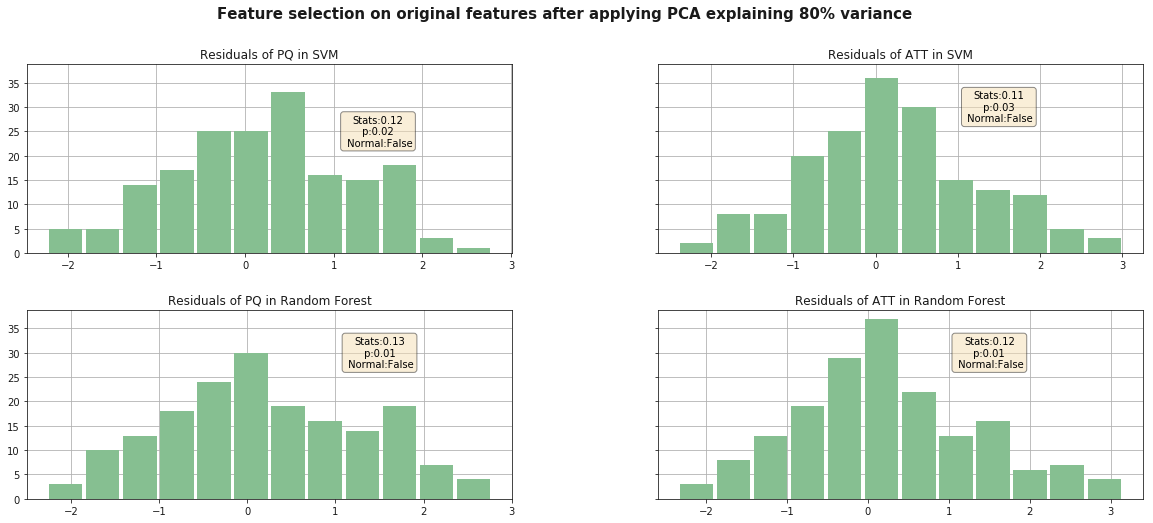

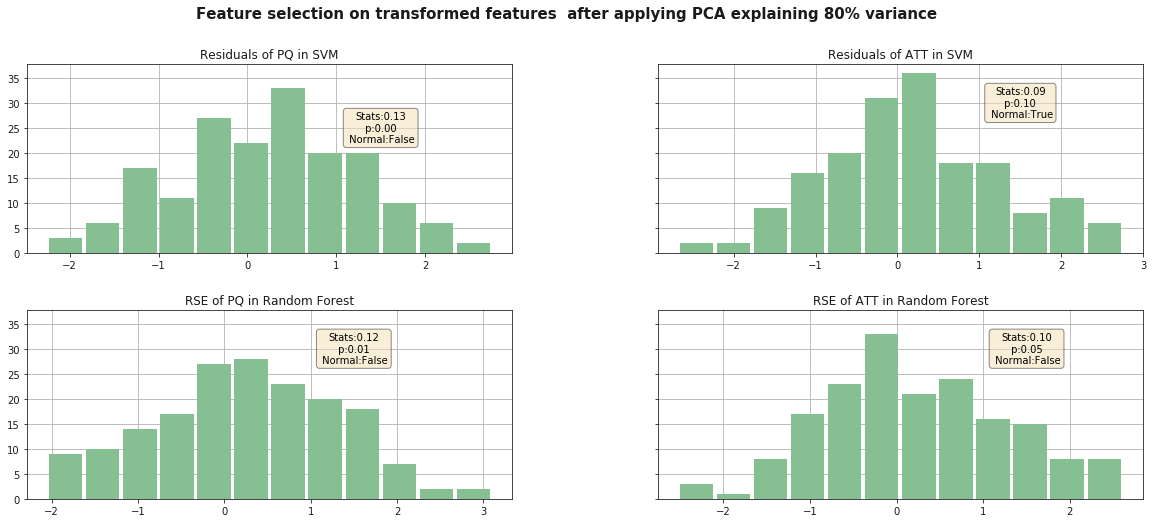

In [10]:
xl_svm = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_PCA_0.8_predictions.xlsx',sheet_name='SVM')
xl_rf = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_PCA_0.8_predictions.xlsx',sheet_name='Random Forest')

fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
xl_svm.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
stats, p = kstest(xl_svm['Residuals_PQ'],'norm')


# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

xl_svm.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
stats, p = kstest(xl_svm['Residuals_ATT'],'norm')
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[0][0].set_title('Residuals of PQ in SVM')
ax[0][1].set_title('Residuals of ATT in SVM')
# fig.suptitle("SVM afer applying PCA on original features with 80% variance explained",weight='bold')


# fig ,ax = plt.subplots(1,2,figsize=(8,4))
stats, p = kstest(xl_rf['Residuals_PQ'],'norm')
xl_rf.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)
xl_rf.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
stats, p = kstest(xl_rf['Residuals_ATT'],'norm')
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[1][0].set_title('Residuals of PQ in Random Forest')
ax[1][1].set_title('Residuals of ATT in Random Forest')

fig.suptitle("Feature selection on original features after applying PCA explaining 80% variance ",weight='bold', fontsize=15)



xl_svm = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_transformed_PCA_0.8_predictions.xlsx',sheet_name='SVM')
xl_rf = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_transformed_PCA_0.8_predictions.xlsx',sheet_name='Random Forest')

fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
xl_svm.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
stats, p = kstest(xl_svm['Residuals_PQ'],'norm')


# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

xl_svm.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
stats, p = kstest(xl_svm['Residuals_ATT'],'norm')
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[0][0].set_title('Residuals of PQ in SVM')
ax[0][1].set_title('Residuals of ATT in SVM')
# fig.suptitle("SVM afer applying PCA on original features with 80% variance explained",weight='bold')


# fig ,ax = plt.subplots(1,2,figsize=(8,4))
stats, p = kstest(xl_rf['Residuals_PQ'],'norm')
xl_rf.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)
xl_rf.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
stats, p = kstest(xl_rf['Residuals_ATT'],'norm')
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f \n Normal:%s'%(stats,p,p>0.05),
                           ha="center", va="center", color="black",bbox=props)

# set_style(ax)
ax[1][0].set_title('RSE of PQ in Random Forest')
ax[1][1].set_title('RSE of ATT in Random Forest')

fig.suptitle("Feature selection on transformed features  after applying PCA explaining 80% variance",weight='bold', fontsize=15)